In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV And convert to **DataFrame**

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

# **Preprocessing**

**Shape of Data**

In [3]:
df.shape

(10000, 14)

**All the Columns**

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## First Five **rows**

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DataTypes of each column**

In [5]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


**Check Null Values**

In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Check Duplicates**

In [8]:
df.duplicated().sum()

np.int64(0)

**Information of all columns**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Summary of numerical column**

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Exploratory Data Analysis (EDA)**

In [11]:
num_data = df.select_dtypes(['float64','int64'])
n = num_data.columns

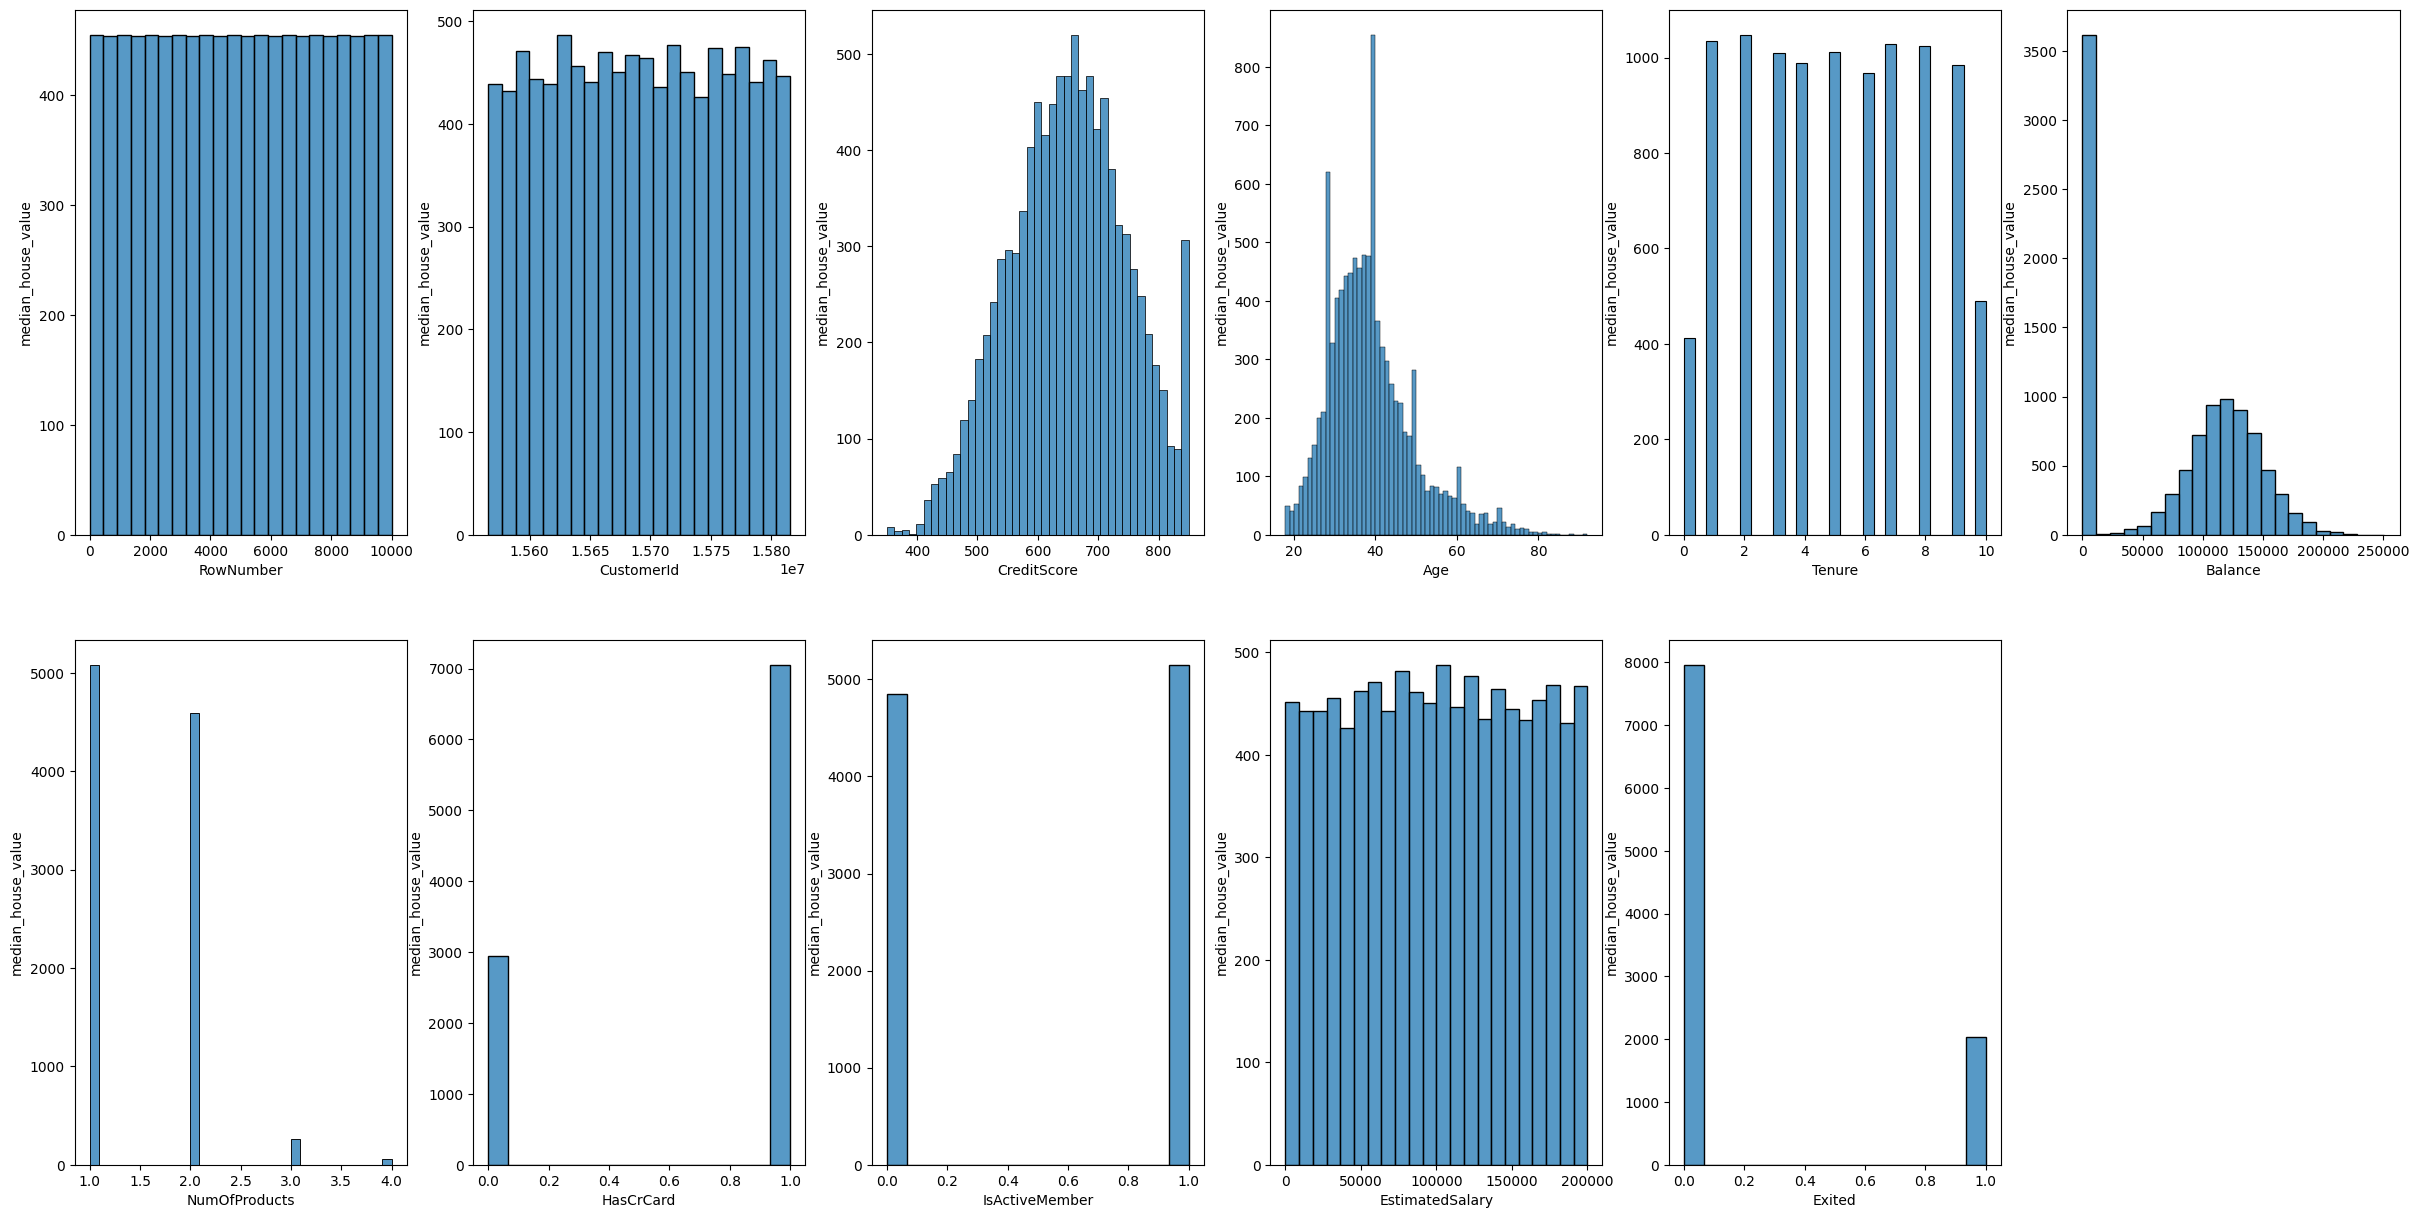

In [12]:
plt.figure(figsize=(30,15))
def fn1(n):
  for idx, i in enumerate(n,1):
    plt.subplot(2,6,idx)
    sns.histplot(df[i])
    plt.xlabel(i)
    plt.ylabel('median_house_value')
  plt.show()
fn1(n)

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()
plot_no = 1

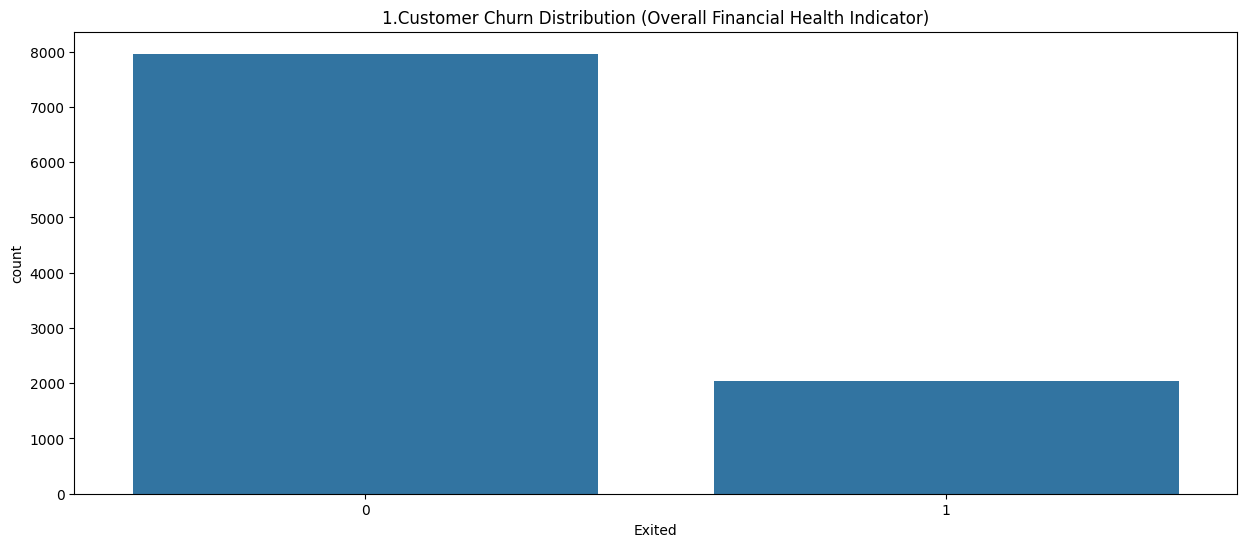

In [14]:
fig = plt.figure(figsize=(15,6))
sns.countplot(data = df , x='Exited')
plt.title(f'{plot_no}.Customer Churn Distribution (Overall Financial Health Indicator)')
show_fig
plot_no+=1

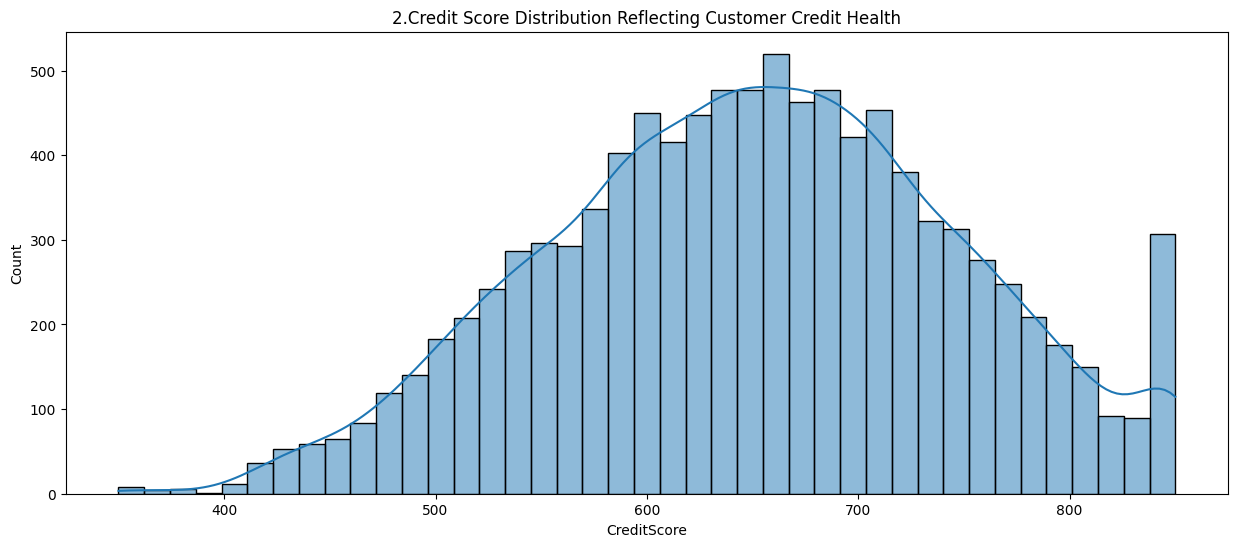

In [15]:
fig = plt.figure(figsize=(15,6))
sns.histplot(data = df , x='CreditScore' , kde=True)
plt.title(f'{plot_no}.Credit Score Distribution Reflecting Customer Credit Health')
show_fig
plot_no+=1

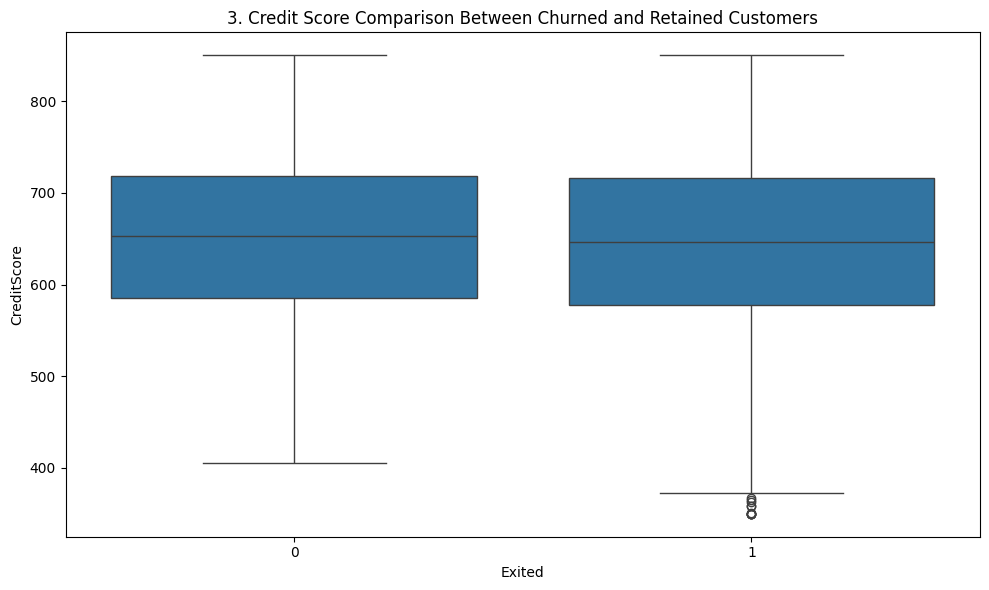

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title(f'{plot_no}. Credit Score Comparison Between Churned and Retained Customers')
show_fig()
plot_no += 1

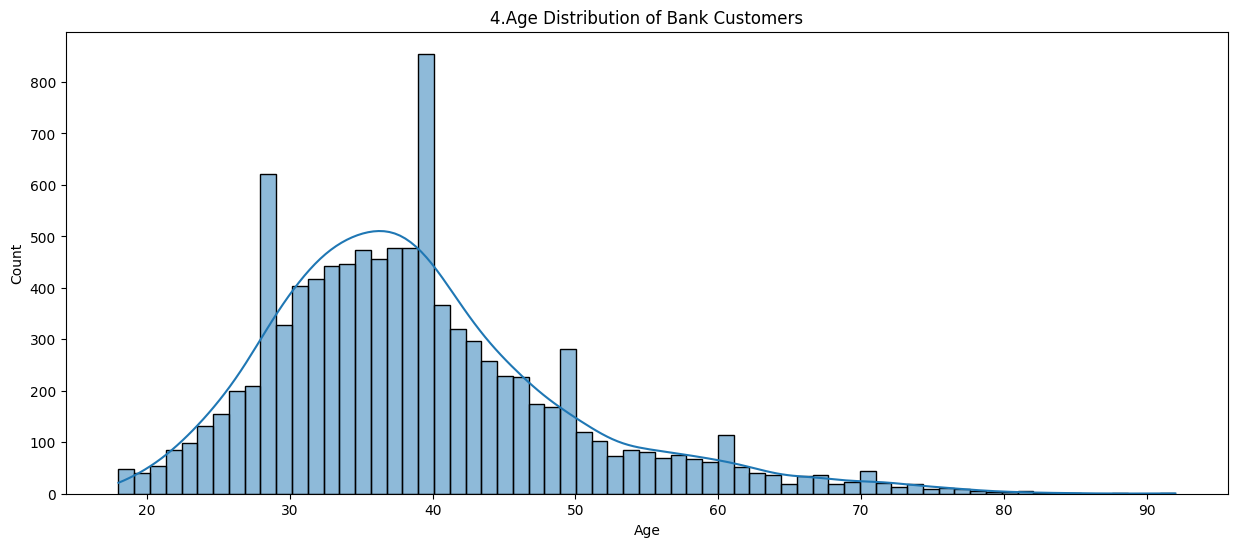

In [17]:
fig = plt.figure(figsize=(15,6))
sns.histplot(data = df , x='Age' , kde=True)
plt.title(f'{plot_no}.Age Distribution of Bank Customers')
show_fig
plot_no+=1

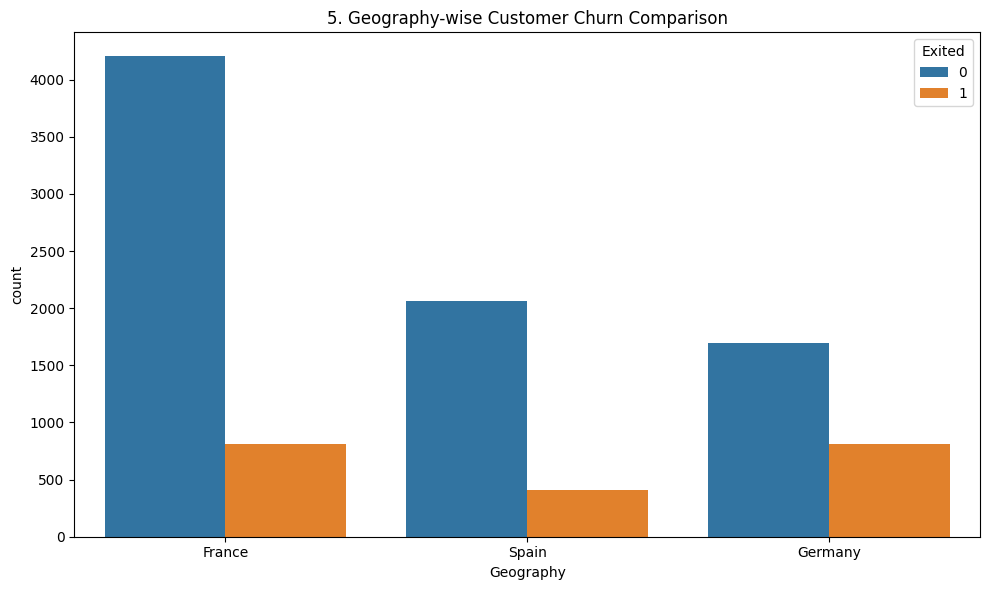

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title(f'{plot_no}. Geography-wise Customer Churn Comparison')
show_fig()
plot_no += 1

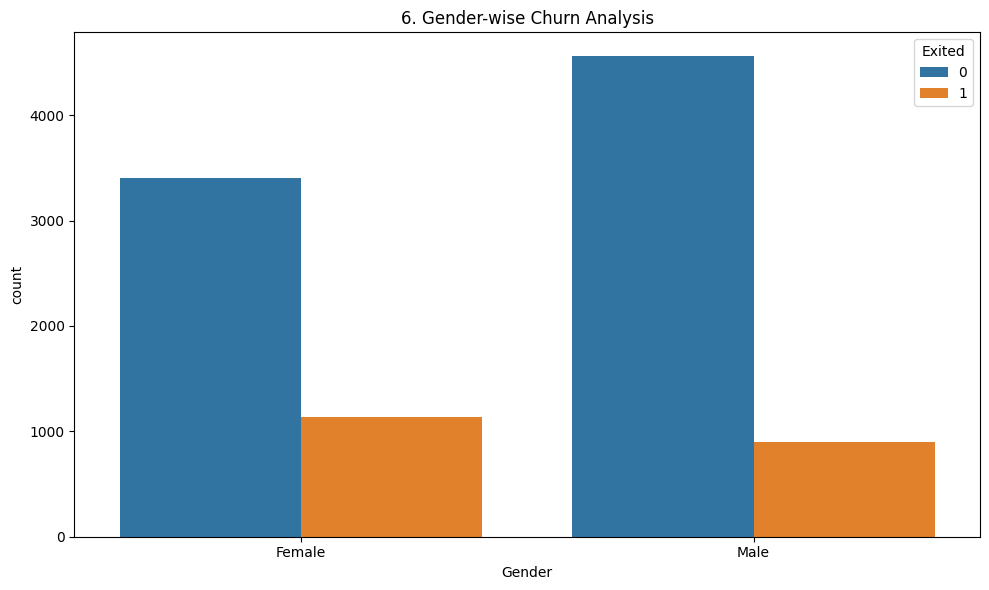

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title(f'{plot_no}. Gender-wise Churn Analysis')
show_fig()
plot_no += 1

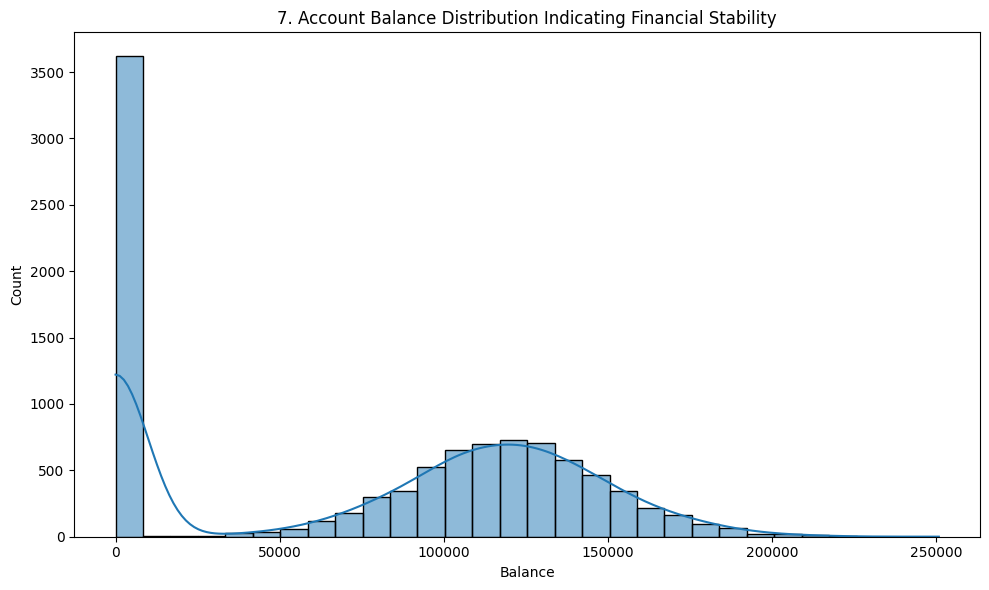

In [20]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["Balance"], bins=30, kde=True)
plt.title(f'{plot_no}. Account Balance Distribution Indicating Financial Stability')
show_fig()
plot_no += 1

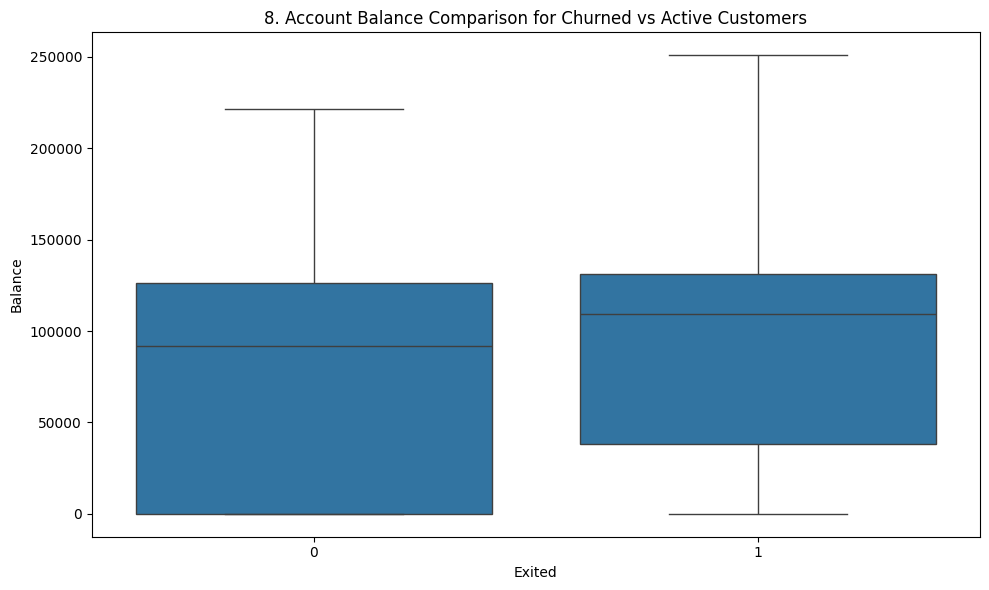

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title(f'{plot_no}. Account Balance Comparison for Churned vs Active Customers')
show_fig()
plot_no += 1

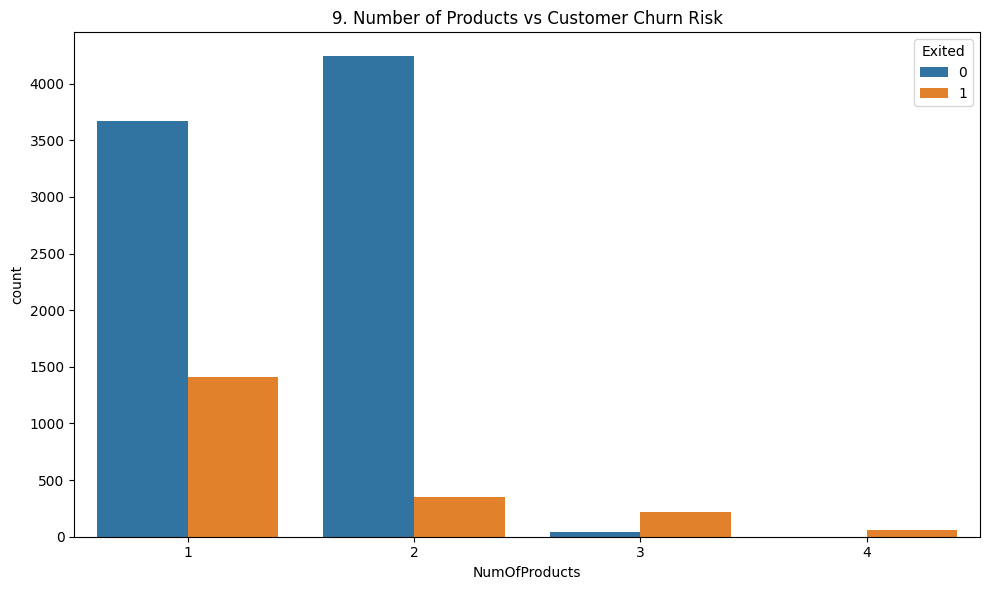

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="NumOfProducts", hue="Exited")
plt.title(f'{plot_no}. Number of Products vs Customer Churn Risk')
show_fig()
plot_no += 1

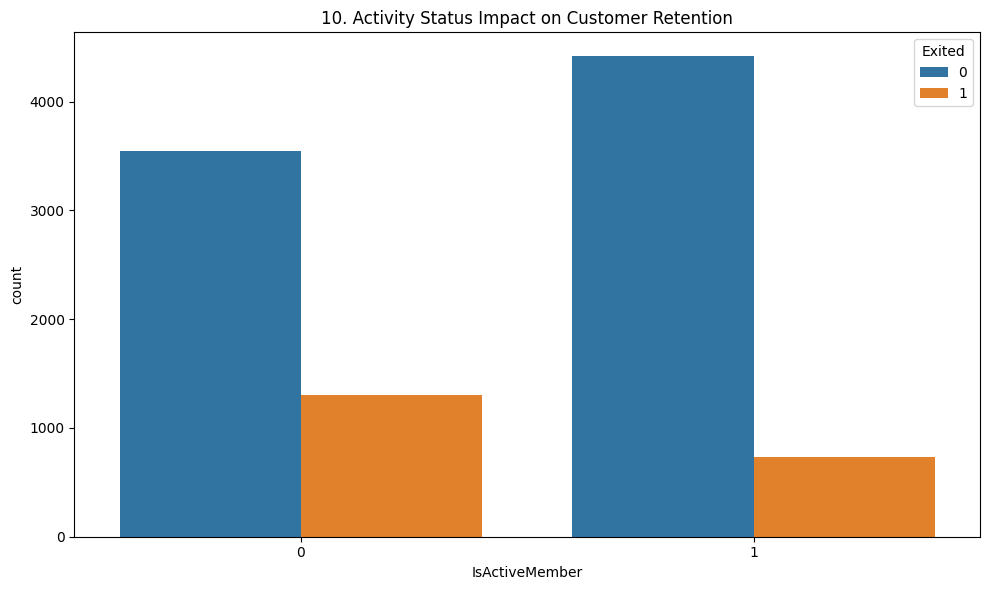

In [23]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="IsActiveMember", hue="Exited")
plt.title(f'{plot_no}. Activity Status Impact on Customer Retention')
show_fig()
plot_no += 1

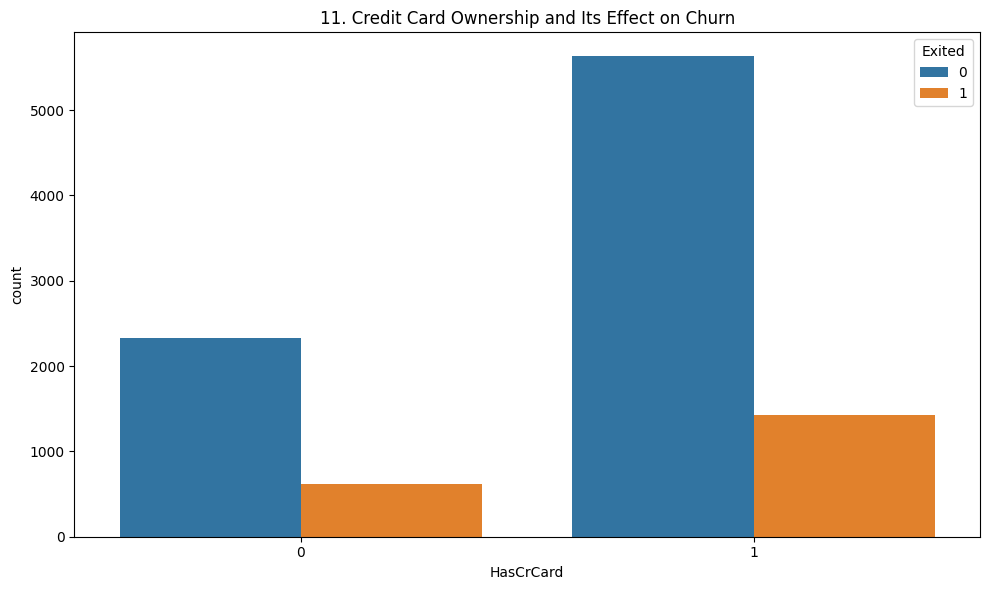

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="HasCrCard", hue="Exited")
plt.title(f'{plot_no}. Credit Card Ownership and Its Effect on Churn')
show_fig()
plot_no += 1

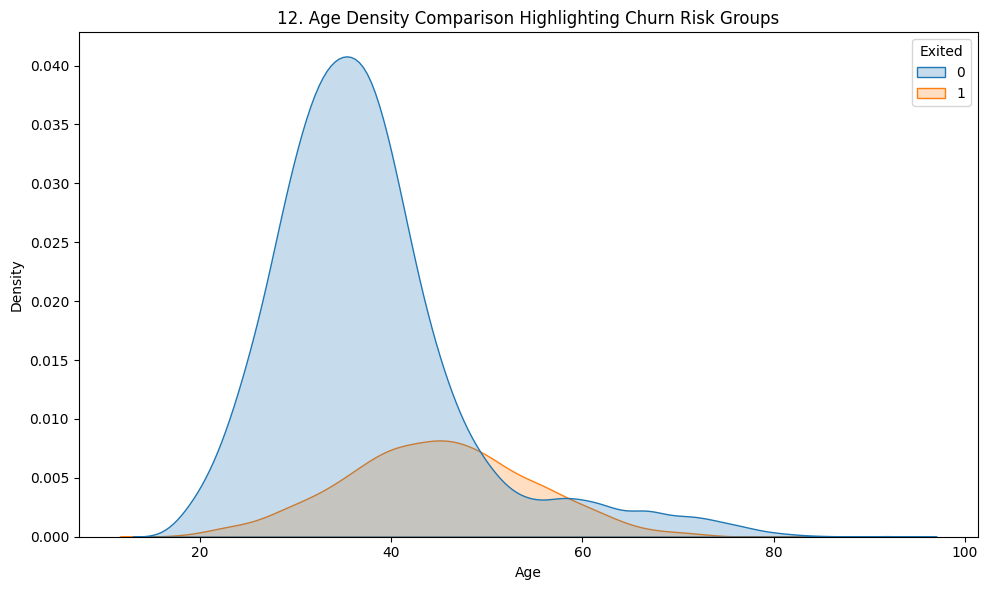

In [25]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Exited", fill=True)
plt.title(f'{plot_no}. Age Density Comparison Highlighting Churn Risk Groups')
show_fig()
plot_no += 1

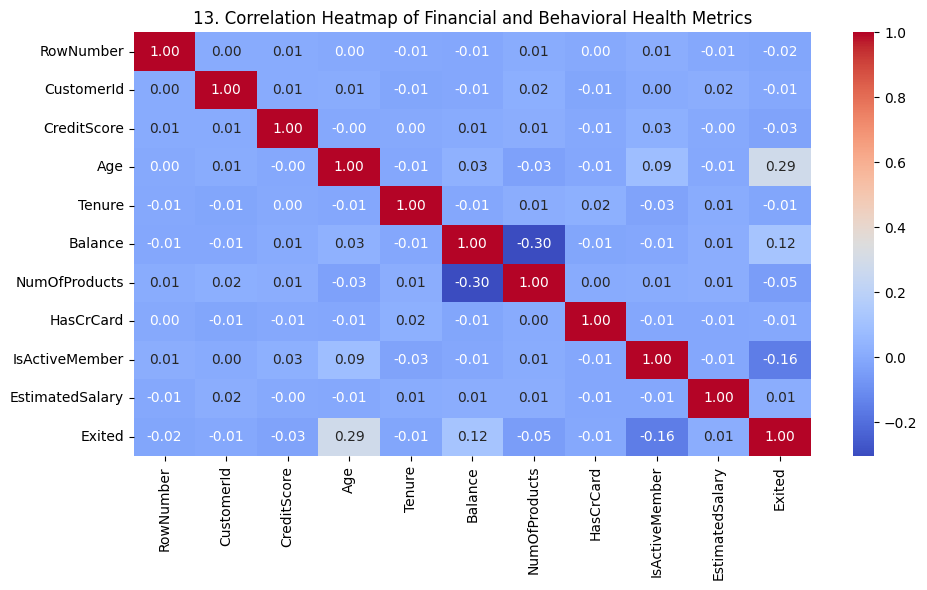

In [26]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f'{plot_no}. Correlation Heatmap of Financial and Behavioral Health Metrics')
show_fig()
plot_no += 1

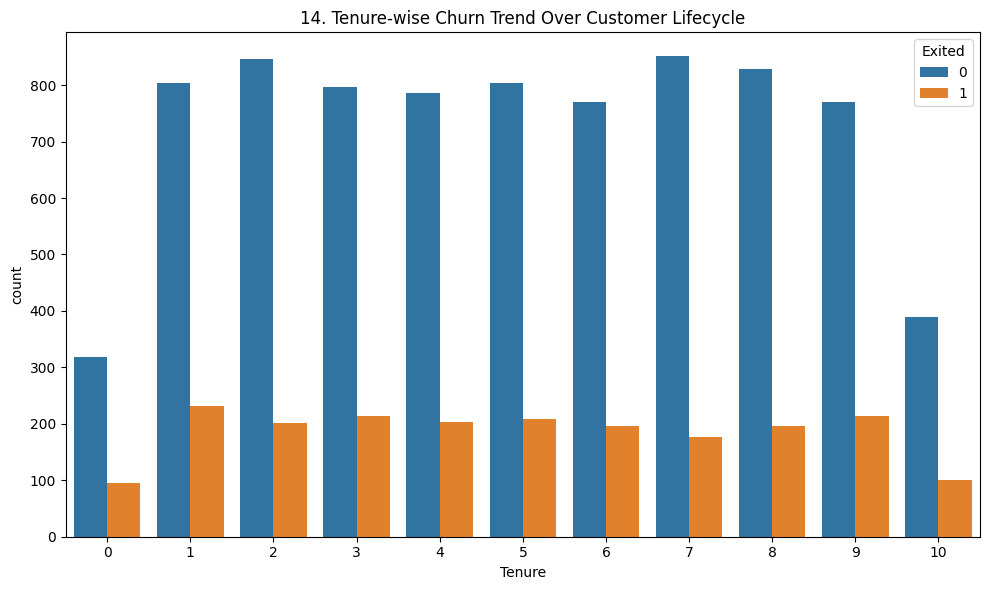

In [27]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Tenure", hue="Exited")
plt.title(f'{plot_no}. Tenure-wise Churn Trend Over Customer Lifecycle')
show_fig()
plot_no += 1

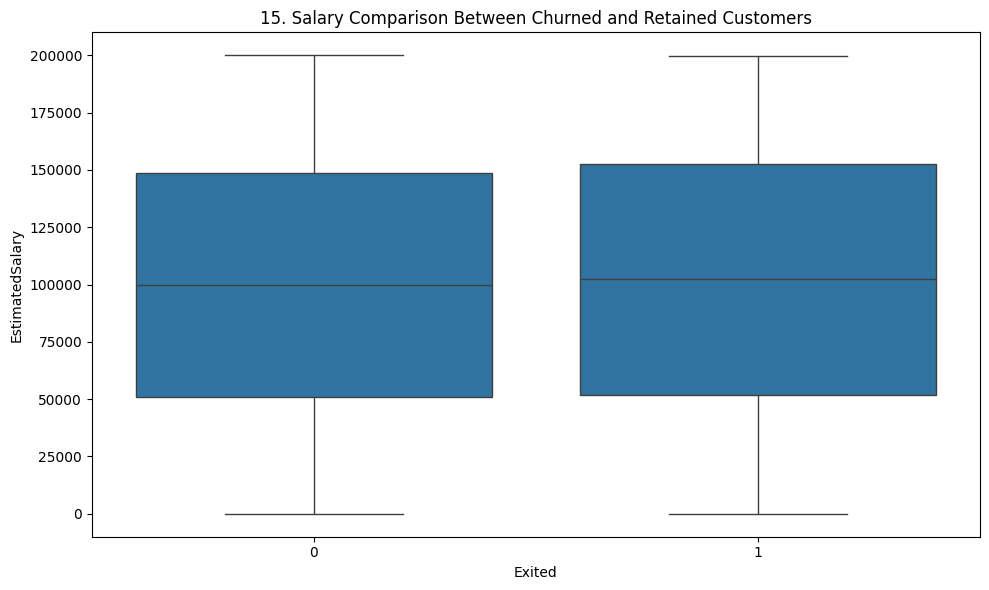

In [28]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="EstimatedSalary")
plt.title(f'{plot_no}. Salary Comparison Between Churned and Retained Customers')
show_fig()
plot_no += 1

**Train . Test Splits**

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
x = df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname' , 'Exited'])
y = df['Exited']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

In [32]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape

(8000, 10)

# **ColumnTransformer**

In [34]:
preprocessor = ColumnTransformer(transformers=[
    ('ohe' , OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore') , ['Geography','Gender'])
    # ('standardization' ,StandardScaler(),[])
],remainder=StandardScaler()
)

In [35]:
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

In [36]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 8.7 MB/s eta 0:00:00


In [37]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report , confusion_matrix

# **#Logistic regression with optuna**

In [38]:
#Logistic regression with optuna
def objective_logreg(trial):

    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    C = trial.suggest_float("C", 0.001, 10, log=True)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])
    max_iter = trial.suggest_int("max_iter", 200, 1000)

    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        class_weight=class_weight,
        max_iter=max_iter
    )

    score = cross_val_score(
        model,
        x_train_scaled,
        y_train,
        cv=5,
        scoring="f1"
    ).mean()


    return score



# run the study

study_logreg = optuna.create_study(direction="maximize")
study_logreg.optimize(objective_logreg, n_trials=50)

print("Best Logistic Regression Params:", study_logreg.best_params)
print("Best F1 Score:", study_logreg.best_value)


[I 2026-02-02 03:28:04,007] A new study created in memory with name: no-name-d1e1458f-4c7f-4307-bf5d-bd780eb9322f
[I 2026-02-02 03:28:04,148] Trial 0 finished with value: 0.32013855559005944 and parameters: {'penalty': 'l2', 'C': 4.836684966375503, 'solver': 'saga', 'class_weight': None, 'max_iter': 799}. Best is trial 0 with value: 0.32013855559005944.
[I 2026-02-02 03:28:04,214] Trial 1 finished with value: 0.32013855559005944 and parameters: {'penalty': 'l1', 'C': 2.250073766488021, 'solver': 'liblinear', 'class_weight': None, 'max_iter': 480}. Best is trial 0 with value: 0.32013855559005944.
[I 2026-02-02 03:28:04,384] Trial 2 finished with value: 0.49354975465962136 and parameters: {'penalty': 'l2', 'C': 0.3488393526296508, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 329}. Best is trial 2 with value: 0.49354975465962136.
[I 2026-02-02 03:28:04,602] Trial 3 finished with value: 0.2965744968179159 and parameters: {'penalty': 'l2', 'C': 0.03530568113271647, 'solver': 's

Best Logistic Regression Params: {'penalty': 'l1', 'C': 0.11617008642238447, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 717}
Best F1 Score: 0.4962029175698402


# **#RandomForestClassifier with optuna**

In [39]:
#RandomForestClassifier with optuna
def objective_rf(trial):

    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        class_weight="balanced",
        random_state=42
    )

    score = cross_val_score(
        model,
        x_train_scaled,
        y_train,
        cv=5,
        scoring="f1"
    ).mean()

    return score

#run the study

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)

print("Best Random Forest Params:", study_rf.best_params)
print("Best F1 Score:", study_rf.best_value)


[I 2026-02-02 03:28:13,920] A new study created in memory with name: no-name-9d248c0b-5f38-4660-9f4c-9967567288b0
[I 2026-02-02 03:28:27,609] Trial 0 finished with value: 0.5991452823598288 and parameters: {'n_estimators': 143, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 0 with value: 0.5991452823598288.
[I 2026-02-02 03:28:33,679] Trial 1 finished with value: 0.5866029696312796 and parameters: {'n_estimators': 280, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.5991452823598288.
[I 2026-02-02 03:28:57,440] Trial 2 finished with value: 0.6164065923386912 and parameters: {'n_estimators': 495, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 2 with value: 0.6164065923386912.
[I 2026-02-02 03:29:05,327] Trial 3 finished with value: 0.588077023598771 and parameters: {'n_estimators': 375, 'max_depth': 5, 'min_samples_split

Best Random Forest Params: {'n_estimators': 449, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 5, 'bootstrap': True}
Best F1 Score: 0.6309472160480114


# **#xgboostClassifier with optuna**

In [40]:
#xgboost with optuna
def objective_xgb(trial):

    n_estimators = trial.suggest_int("n_estimators", 200, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 10)

    subsample = trial.suggest_float("subsample", 0.6, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 1.0)

    reg_alpha = trial.suggest_float("reg_alpha", 0, 5)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 5)

    scale_pos_weight = trial.suggest_float("scale_pos_weight", 2, 6)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric="logloss"
    )

    score = cross_val_score(
        model,
        x_train_scaled,
        y_train,
        cv=5,
        scoring="f1"
    ).mean()

    return score

#run the study
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best XGBoost Params:", study_xgb.best_params)
print("Best F1 Score:", study_xgb.best_value)


[I 2026-02-02 03:40:47,920] A new study created in memory with name: no-name-8a28d987-c518-4eca-aa90-40c4e00cabb0
[I 2026-02-02 03:40:51,578] Trial 0 finished with value: 0.5956992386465877 and parameters: {'n_estimators': 478, 'learning_rate': 0.020536547589006193, 'max_depth': 6, 'subsample': 0.7678277338047375, 'colsample_bytree': 0.9231589444319346, 'reg_alpha': 0.49239375670984187, 'reg_lambda': 3.7007496168668603, 'scale_pos_weight': 5.935981535628944}. Best is trial 0 with value: 0.5956992386465877.
[I 2026-02-02 03:40:53,427] Trial 1 finished with value: 0.5784180116330643 and parameters: {'n_estimators': 651, 'learning_rate': 0.2546651489853751, 'max_depth': 4, 'subsample': 0.7526306111875154, 'colsample_bytree': 0.835132554873883, 'reg_alpha': 2.194003602560996, 'reg_lambda': 0.1130509668445584, 'scale_pos_weight': 4.997772023997461}. Best is trial 0 with value: 0.5956992386465877.
[I 2026-02-02 03:40:55,307] Trial 2 finished with value: 0.5892014246990053 and parameters: {'n

Best XGBoost Params: {'n_estimators': 250, 'learning_rate': 0.02892742624919521, 'max_depth': 3, 'subsample': 0.8015766033614269, 'colsample_bytree': 0.856107108119168, 'reg_alpha': 3.0952068563318638, 'reg_lambda': 2.023224155893414, 'scale_pos_weight': 2.2813407351048482}
Best F1 Score: 0.6301529597363571


# **Final Comparison**

In [41]:
print("\n===== Final Comparison =====")

print("Logistic Regression Best F1:", study_logreg.best_value)
print("Random Forest Best F1:", study_rf.best_value)
print("XGBoost Best F1:", study_xgb.best_value)



===== Final Comparison =====
Logistic Regression Best F1: 0.4962029175698402
Random Forest Best F1: 0.6309472160480114
XGBoost Best F1: 0.6301529597363571


# **Train the Best Model Again**

In [42]:
best_params = study_logreg.best_params

best_model_lr = LogisticRegression(
    **best_params
)

best_model_lr.fit(x_train_scaled, y_train)


LogisticRegression(C=0.11617008642238447, class_weight='balanced', max_iter=717,
                   penalty='l1', solver='liblinear')

# **Best Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000




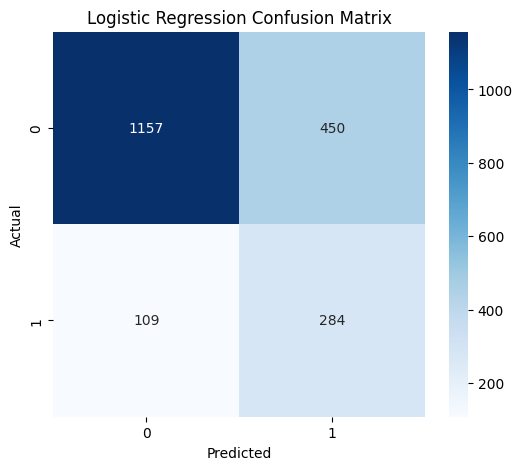

In [43]:
y_pred = best_model_lr.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
print("\n====================")
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Best RandomForestClassifier model**

In [44]:
best_params = study_rf.best_params

best_model_rf = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight="balanced"
)

best_model_rf.fit(x_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=5, min_samples_split=9,
                       n_estimators=449, random_state=42)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.68      0.63       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.85      2000



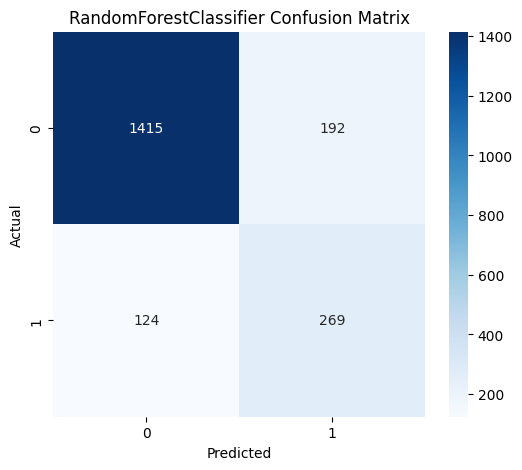

In [45]:
y_pred = best_model_rf.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Best XGBoostClassifier Model**

In [46]:
best_params = study_xgb.best_params

best_model_xgb = XGBClassifier(
    **best_params,
    random_state=42,
    eval_metric="logloss"
)

best_model_xgb.fit(x_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.856107108119168, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02892742624919521,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.62      0.67      0.65       393

    accuracy                           0.86      2000
   macro avg       0.77      0.79      0.78      2000
weighted avg       0.86      0.86      0.86      2000



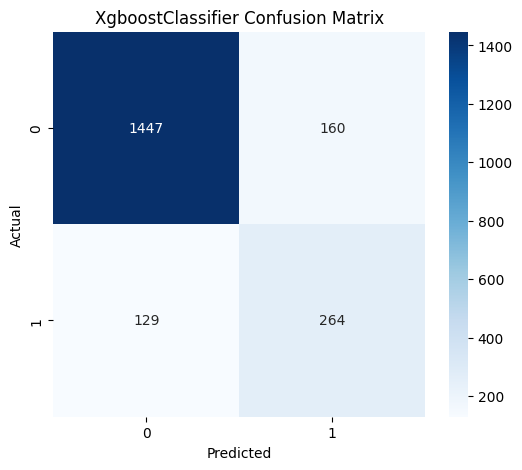

In [47]:
y_pred = best_model_xgb.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XgboostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

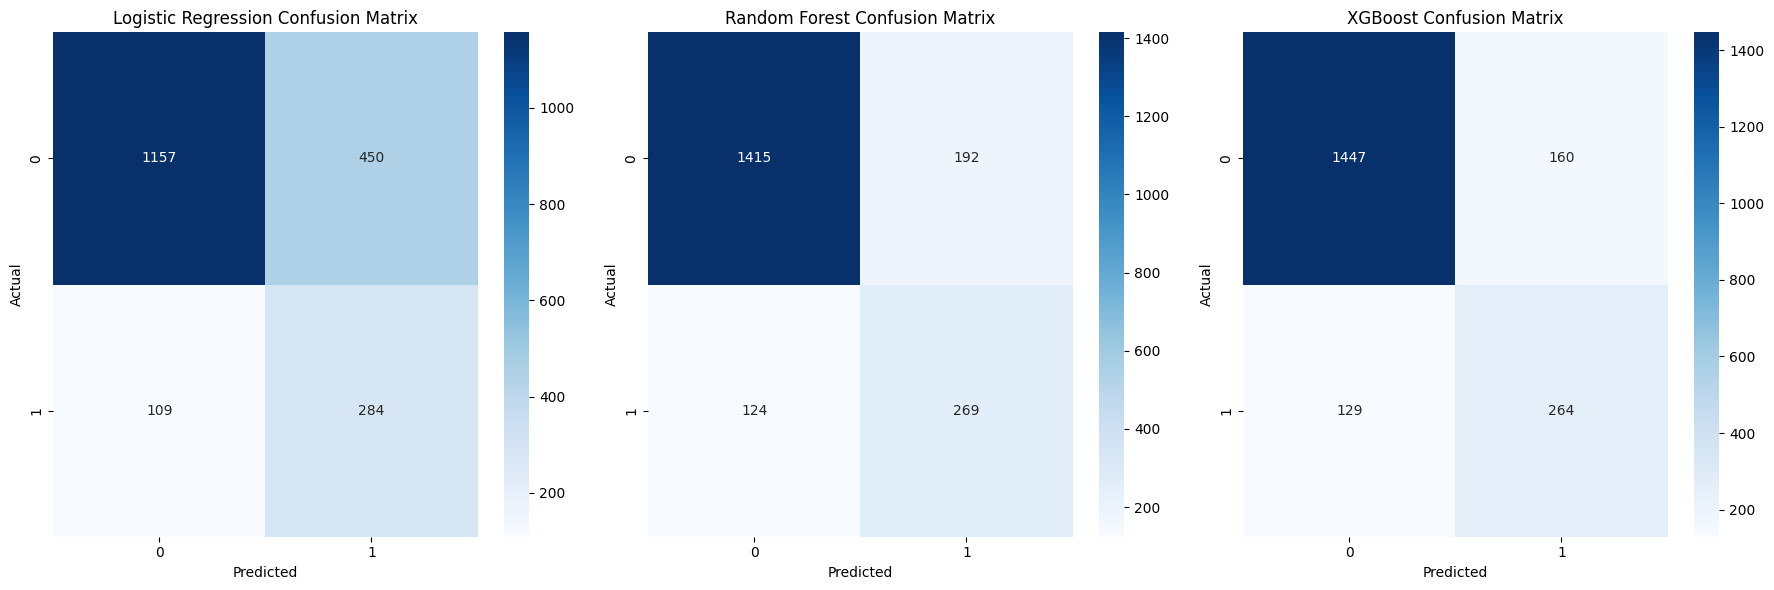

In [48]:
cm_list = [cm_lr, cm_rf, cm_xgb]
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]

# Create subplots
fig, axes = plt.subplots(1, len(cm_list), figsize=(18,6))  # 1 row, 3 columns

for ax, cm, name in zip(axes, cm_list, model_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

here xgboostclassifier seems to be a bettter model compare to other two , becoz we want to reduce retension cost so here our FP is lower ,  now we will try to increase the thresold for xgbooost & lets see the result

              precision    recall  f1-score   support

           0       0.94      0.78      0.86      1607
           1       0.48      0.80      0.60       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000



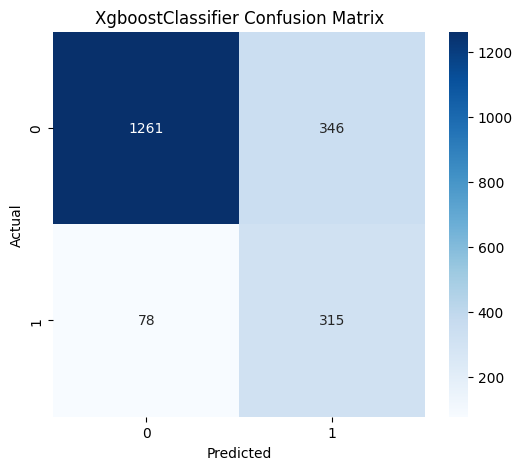

In [49]:
y_prob = best_model_xgb.predict_proba(x_test_scaled)[:,1]
y_pred = (y_prob > 0.35).astype(int)

print(classification_report(y_test, y_pred))
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XgboostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Threshold tuning was applied (0.35 instead of 0.5), improving churn recall from 66% to 80%, allowing the model to capture more at-risk customers for retention strategies.

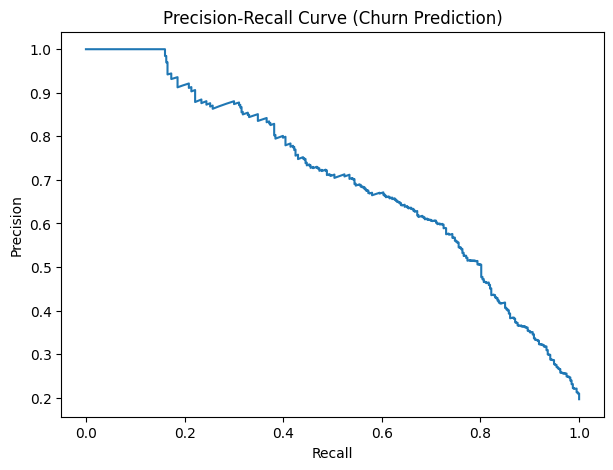

In [50]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Churn Prediction)")
plt.show()

In [51]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    preprocessor,
    best_model_xgb
)

pipe.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Geography', 'Gender'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.856107108...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.02892742624919521, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=250,
                               n_jobs=None, num_parallel_tree=None, ...))])

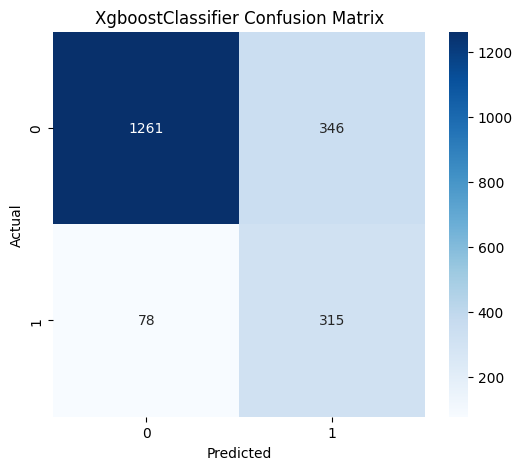

In [52]:
y_prob = pipe.predict_proba(x_test)[:, 1]
threshold = 0.35
y_pred = (y_prob > threshold).astype(int)
cm_pipe = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='Blues')
plt.title("XgboostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
import joblib

joblib.dump(pipe, "churn_pipeline.pkl")


['churn_pipeline.pkl']